In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import sklearn

In [2]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [6]:
df=pd.DataFrame(diabetes.data)
df.columns= diabetes.feature_names

# Creating a column containing target variable
df['diabetes_measure']=diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_measure
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [8]:
# Creating X and y
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X.shape, y.shape

((442, 10), (442,))

In [20]:
# Simple linear regression
from sklearn.linear_model import LinearRegression

multiple_lr = LinearRegression()
multiple_lr = LinearRegression().fit(X,y)

predicted_y = multiple_lr.predict(X)

In [21]:
# Importing cross_val_score function from the model_selection submodule of scikit learn
from sklearn.model_selection import cross_val_score

# storing the ten scores in an object called mse
mse= cross_val_score(multiple_lr, X, y, scoring='neg_mean_squared_error', cv=10)

# taking the mean of mse for using as an indicator of how good the model is
mse.mean()

-3000.3810328390514

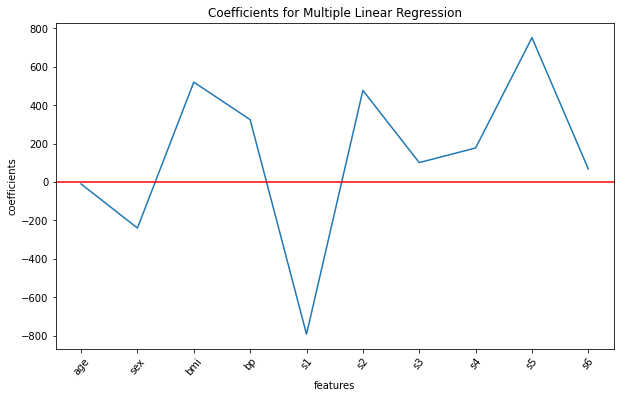

In [26]:
# saving coefficients
multiple_lr_coeffs = multiple_lr.coef_[0]

# fetching feature names from the dataframe df
feature_names = df.drop('diabetes_measure',axis=1).columns
feature_names

# Plot impact on the result of each feature
plt.figure(figsize=(10,6))
plt.plot(range(len(multiple_lr_coeffs)),multiple_lr_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [27]:
# Ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV #find best alpha values


alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
# ridge regression with neg_mean_squared_error as metric, 10-fold cross validation
ridge= GridSearchCV(Ridge(), alpha_values, scoring='neg_mean_squared_error', cv=10 )

#fitting model to data, extracting best alpha values
print('The best value of alpha is:', ridge.fit(X,y).best_params_)
print('The best score for the best Ridge estimator is:',ridge.fit(X,y).best_score_)

The best value of alpha is: {'alpha': 0.04}
The best score for the best Ridge estimator is: -2997.1867937193447


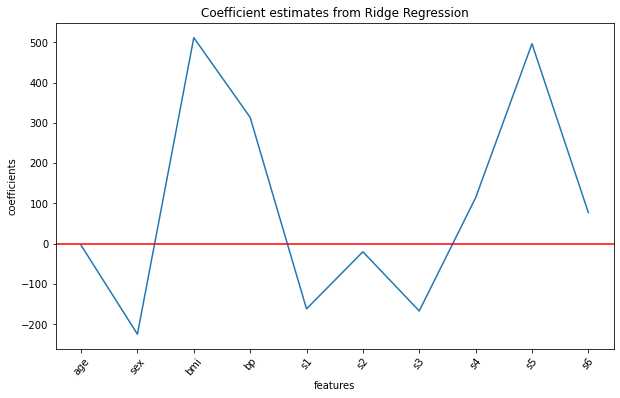

In [28]:
best_ridge_model= Ridge(alpha=0.04)

best_ridge_coeffs = best_ridge_model.fit(X,y).coef_

# plot results
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_ridge_coeffs[0])
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Ridge Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [29]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06,0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
lasso= GridSearchCV(Lasso(), alpha_values, scoring='neg_mean_squared_error', cv=10 )

print('The best value of alpha is:',lasso.fit(X,y).best_params_)
print('The best score for the best Lasso estimator is:',lasso.fit(X,y).best_score_)

The best value of alpha is: {'alpha': 0.06}
The best score for the best Lasso estimator is: -2987.4180821246423


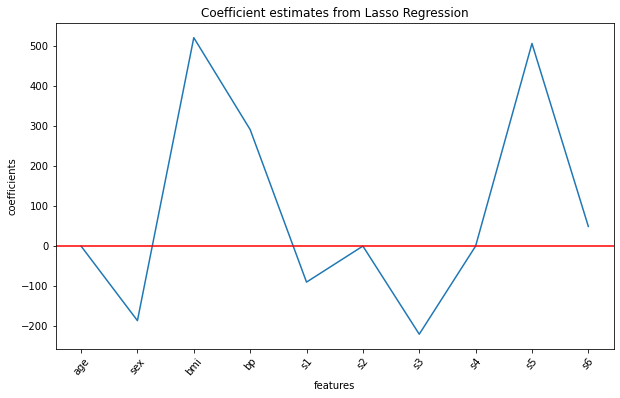

In [30]:
best_lasso_model= Lasso(alpha=0.06)

best_lasso_coeffs = best_lasso_model.fit(X,y).coef_

# plot
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_lasso_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [32]:
# ElasticNet regression
from sklearn.linear_model import ElasticNet
alpha_values = {'alpha':[0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
                'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}

elastic= GridSearchCV(ElasticNet(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
elastic.fit(X,y).best_params_, elastic.fit(X,y).best_score_

({'alpha': 0.06, 'l1_ratio': 1}, -2987.4180821246423)

In [35]:
# Creating a dataframe containing coefficient estimates from three models
comparing_models = pd.DataFrame({'without_regularization':multiple_lr_coeffs,
                                 'Ridge':best_ridge_coeffs[0],
                                 'Lasso':best_lasso_coeffs},
                                  index=feature_names)
comparing_models

,without_regularization,Ridge,Lasso
age,-10.012198,-3.609650,-0.000000
sex,-239.819089,-224.329482,-186.309245
bmi,519.839787,511.203719,520.894116
bp,324.390428,313.552715,291.196041
s1,-792.184162,-161.533876,-90.068555
s2,476.745838,-19.892974,-0.000000
s3,101.044570,-166.679798,-220.207264
s4,177.064176,113.950246,0.000000
s5,751.279321,496.222270,506.422212
s6,67.625386,77.443906,49.074614


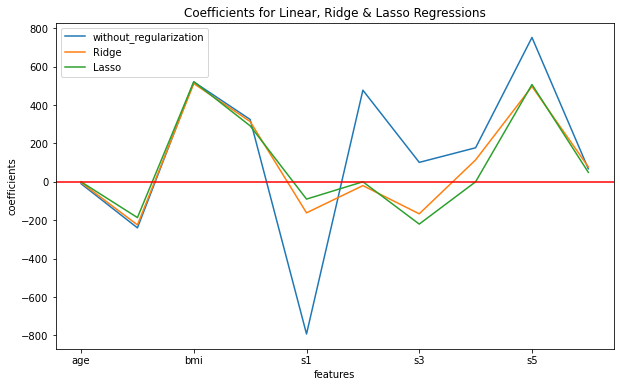

In [36]:
comparing_models.plot(figsize=(10, 6))
plt.axhline(0, color='r', linestyle='solid')
plt.title("Coefficients for Linear, Ridge & Lasso Regressions")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()